In [1]:
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 辅助内嵌画图命令
import warnings
warnings.filterwarnings("ignore")

## 4.1 Matplotlib绘图库

Matplotlib是Python最著名的图表绘制库，支持很多绘图工具，可以从其官网中看到大量的图表及对应的使用方法。本节不尽数所有方法和参数，而是从功能的角度出发，介绍在数据分析时最常用的方法及使用场景。

### 4.1.1 安装软件
推荐anaconda安装
conda install matplotlib

### 4.1.2  散点图与气泡图

#### 1. 散点图

Matplotlib的pyplot模块提供了类似MATLAB的绘图接口，其中plot函数最为常用。它支持绘制散点图、线图，本例中使用plot函数绘制散点图。

散点图通常用于展示数据的分布情况，即x与y的关系。在数据分析中，最常用的场景是将两维特征分别作为x轴和y轴，通过散点图展示二者的相关性。

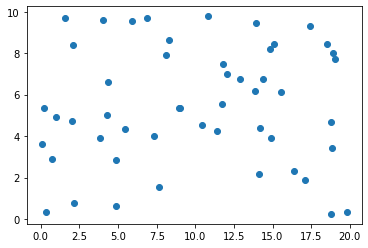

In [2]:
# 散点图
x = np.random.rand(50) * 20 # 随机生成50个点，x轴取值范围0-20
y = np.random.rand(50) * 10 # 随机生成50个点，y轴取值范围0-10
plt.plot(x, y, 'o') # 用'o'指定绘制点图
plt.show()

#### 2. 气泡图

气泡图的绘制函数 scatter 也常被用于绘制上例中的散点图。相对于 plot 函数，scatter函数提供更强大的功能，支持指定每个点的大小及颜色，可以展示更多维度的信息。

在例程中，由于用参数s指定每个图点面积的大小、用参数c指定每个点的颜色，因此，图中可以展示四个维度的信息。但在实际应用中，一张图中四个维度携带的信息量太大，更多的时候仅使用x轴，y轴及面积大小这三个维度。

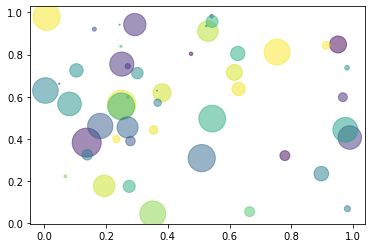

In [3]:
# 气泡图
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N) # 点的颜色
area = (30 * np.random.rand(N))**2  # 点的半径
plt.scatter(x, y, s=area, c=colors, alpha=0.5) # 由于点可能叠加，设置透明度为0.5
plt.show()

### 4.1.3  线图

线图常用于展示当x轴数据有序增长时，y轴的变化规律。

#### 1. 对比线图

本例也使用了 plot 函数进行绘制，不同的是绘制线图可在同一张图中展示两条曲线，可看到对比效果。

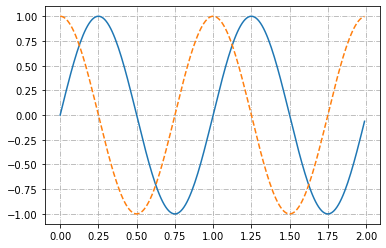

In [4]:
# 对比线图

x = np.arange(0.0, 2.0, 0.01) # 生成范围从0.0-2.0，步长为0.01的数组
y = np.sin(2 * np.pi * x)
z = np.cos(2 * np.pi * x)
plt.plot(x, y) # 绘制实线
plt.plot(x, z, '--') # 绘制虚线
plt.grid(True, linestyle='-.') # 设置背景网格
plt.show()

#### 2. 时序图

线图的另一个常见应用场景是绘制时序图，从时序图中可以直观地看出整体趋势、时间周期，以及特殊日期带来的影响。在绘制时序图时，x轴一般为时间类型数据。

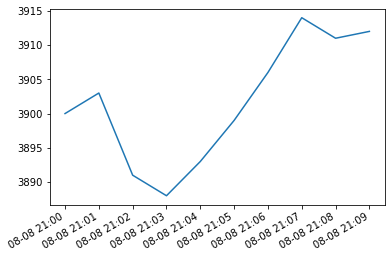

In [5]:
# 时序图
import pandas as pd
import matplotlib.dates as mdates

x = ['20170808210000' ,'20170808210100' ,'20170808210200' ,'20170808210300'
     ,'20170808210400' ,'20170808210500' ,'20170808210600' ,'20170808210700'
     ,'20170808210800' ,'20170808210900']

x = pd.to_datetime(x)
y = [3900.0,  3903.0,  3891.0,  3888.0,  3893.0,
     3899.0,  3906.0,  3914.0,  3911.0,  3912.0]

plt.plot(x, y)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M')) # 设置时间显示格式
plt.gcf().autofmt_xdate() # 自动旋转角度，以避免重叠
plt.show()

### 4.1.4  柱状图

柱状图、条形图、堆叠图和直方图都属于柱状图范畴，柱状图的核心功能在于对比柱与柱之间的关系，常用于统计中。例如，常用直方图描述单个变量值的分布情况，也可在不同分类之下用柱状图描述各个类别的计数、均数或者数据之和，以对比类间的差异。

#### 1.柱状图

本例中使用bar函数绘制普通柱图，其横坐标可以是数值，也可以是字符串。

<BarContainer object of 4 artists>

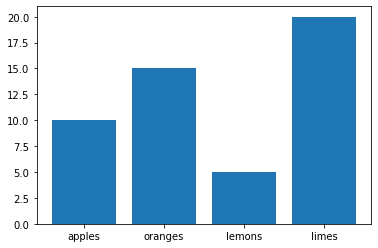

In [6]:
# 柱状图

data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
plt.bar(list(data.keys()), list(data.values()))

#### 2. 条形图

本例中使用bar函数绘制普通柱图，其横坐标可以是数值，也可以是字符串。

本例中用error数组模拟了误差范围，可以将此图解读为酸橙limes的平均值为20，用柱表示，上下波动范围为±7，用黑色线条表示。它们对应了数值型数据统计中最重要的两个因素：均值和方差。

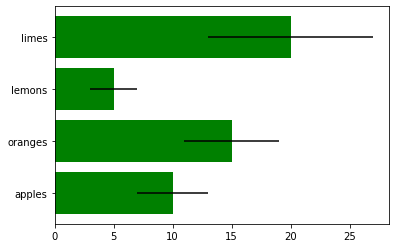

In [7]:
# 条形图
data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
error = [3, 4, 2, 7] 
plt.barh(list(data.keys()), list(data.values()), xerr=error, align='center', 
        color='green', ecolor='black')
plt.show()

#### 3. 堆叠图

堆叠图是在同一张图中展示了两组柱，以及两组柱叠加的结果，也是常用的统计工具。

本例中使用bar函数的参数bottom设置第二组柱显示的起点，以实现堆叠效果。另外，还设置了柱的宽度。

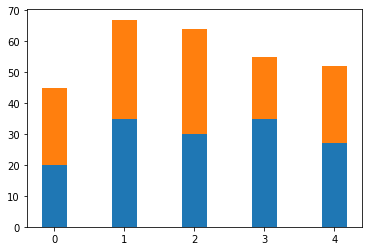

In [8]:
# 堆叠图
y1 = (20, 35, 30, 35, 27)
y2 = (25, 32, 34, 20, 25)
x = np.arange(len(y1))
width = 0.35
p1 = plt.bar(x, y1, width)
p2 = plt.bar(x, y2, width, bottom=y1) # 堆叠图
plt.show()

#### 4. 直方图

直方图是使用频率最高的柱图，常用它来展示数据的分布。与上述几种柱图不同的是，在通常情况下，直方图只需要指定一个参数，而非x和y两个参数。它分析的是一组数据的内部特征，而非两组数据的相互关系。



(array([[ 3.,  7.,  5.,  4.,  3.,  3., 10.,  3.,  6.,  6.],
        [ 6.,  4.,  4.,  4.,  5.,  5.,  3.,  1., 10.,  8.]]),
 array([0.00540669, 0.10442953, 0.20345237, 0.30247522, 0.40149806,
        0.5005209 , 0.59954374, 0.69856658, 0.79758943, 0.89661227,
        0.99563511]),
 <a list of 2 BarContainer objects>)

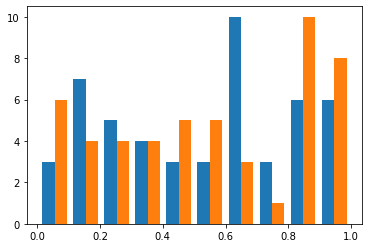

In [9]:
# 直方图
x = np.random.rand(50, 2) # 产生共两组，每组50个随机数,
plt.hist(x)

### 4.1.5  饼图

饼图用于展示一组数据的内部规律，多用于分类后展示各个类别的统计值。相对于其他图表，饼图携带的信息量不大，不太容易出效果。使用饼图有一些注意事项，比如太过细碎的分类，最好把占比不多的归为一类，描述为“其他”；如果只有两种类别，与其做饼图，不如用文字描述。

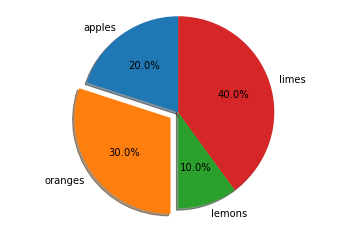

In [10]:
data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
explode = (0, 0.1, 0, 0)  # 向外扩展显示的区域
plt.pie(data.values(), explode=explode, labels=data.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal') # 设置饼图为正圆形
plt.show()

### 4.1.6  箱线图和小提琴图

箱线图和小提琴图同为统计图，是二维图中相对较难理解的图示，但由于它们可以在一张图中描述各个分组的多种性质，因此也被广泛使用。

#### 1. 箱线图

箱线图中每个箱体描述的是一组数，箱体从上到下的五条横线分别对应该组的最大值、75分位数、中位数、25分位数和最小值，相对于均值和方差，该描述携带更多的信息。

在作箱线图时，通常涉及数值型和分类型两种特征，比如先利用性别（分类型变量）将学生分为两组，然后计算每组学生身高（数值型变量）的统计值。

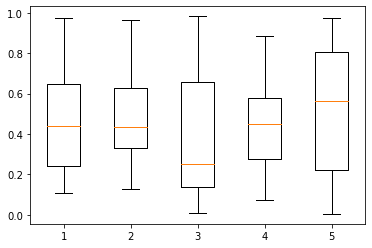

In [11]:
# 箱线图

data = np.random.rand(20, 5) # 生成5个维度数据，每组20个
plt.boxplot(data)
plt.show()

#### 2.小提琴图

小提琴图的功能类似于箱线图，除了最大值、最小值和中位数，小提琴图两侧的曲线还描述了概率密度，相对来说展示的信息更为具体。

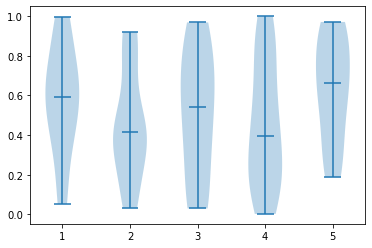

In [12]:
# 小提琴图
data = np.random.rand(20, 5)
plt.violinplot(data,showmeans=False,showmedians=True)
plt.show()

### 4.1.7  三维图

#### 1. 三维散点图

mpl_toolkits.mplot3d模块提供了三维绘图功能，但它在大数据量绘图时速度较慢。三维图的优势在于能在同一图表中展示出三维特征的相互关系，但三维静态的图片由于不能随意旋转，故描述能力有限。

程序用Axes3D函数构造了三维的绘图区域，并绘制出散点图，通常在x轴和y轴两个方向绘制自变量x1和x2，在z轴方向上绘制因变量y。

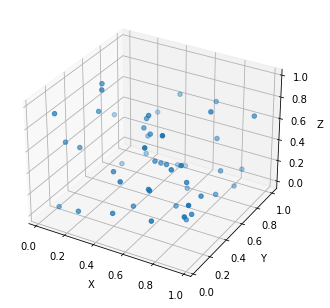

In [13]:
# 三维散点图
from mpl_toolkits.mplot3d import Axes3D

data = np.random.rand(50, 3) # 生成三维数据，每维50个
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

#### 2.三维柱状图

与二维柱图一样，三维柱图也常用于描述统计数量。由于三维的统计数据是通过两个类别特征统计得出的，因此它同时也反应了两个特征交互作用的结果。

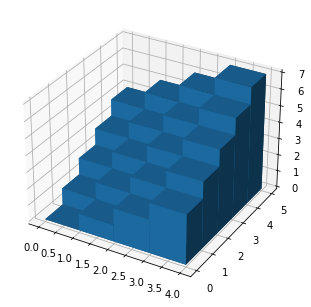

In [14]:
# 三维柱图

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y) # 生成网格点坐标矩阵
x, y = _xx.ravel(), _yy.ravel() # 展开为一维数组

top = x + y
bottom = np.zeros_like(top) # 与top数组形状一样，内容全部为0
width = depth = 1

ax.bar3d(x, y, bottom, width, depth, top, shade=True)
plt.show()

#### 3. 三维曲面图和等高线图

本例使用plot_surface函数绘制三维曲面图，只需要指定其X轴、Y轴和Z轴上的三维数组即可绘制曲面图，并将图像在z轴方向上投影。

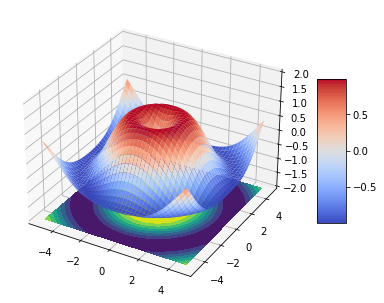

In [15]:
# 三维曲面图和等高线图

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm) # rstride:行之间的跨度  cstride:列之间的跨度
ax.contourf(X,Y,Z,zdir='z',offset=-2) # 把等高线向z轴投射
ax.set_zlim(-2,2) # 设置z轴范围
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### 4.1.8  Matplotlib绘图区域

在绘图时，一般包括从大到小三个层次：画板、画布、绘图区。在Matplotlib中，窗口就是画板，Figure是绘制对象，Axes是绘图区。当我们需要在一张大图中展示多张子图时，就要用到绘图区域的概念。

一个绘制对象中可以包含一个或多个 Axes 子图，每个 Axes 都是一个拥有自己坐标系统的绘图区域。在上述例程中，使用的都是默认绘图对象和子图。

subplot(nrows,ncols,index,**kwargs)
* nrows：整体绘图对象中的总行数。
* ncols：整体绘图对象中的总列数。
* index：指定编号，编号顺序为从左到右、从上到下，从1开始。如果nrows，ncols，index三个参数值都小于10，就可以去掉逗号，如“221”。

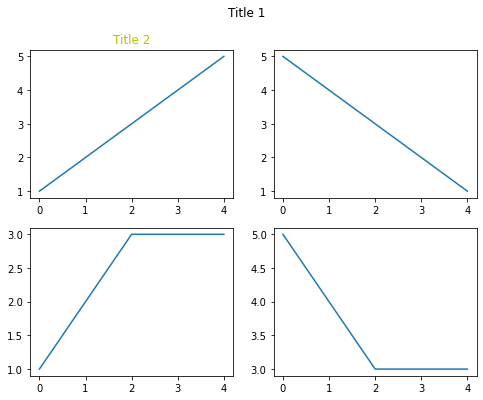

In [16]:
fig = plt.figure(figsize = (8,6))  # 8x6英寸
fig.suptitle("Title 1") # 主标题
ax1 = plt.subplot(221) # 整体为两行两列，创建其中的第一个子图
ax1.set_title('Title 2',fontsize=12,color='y')  # 子标题
ax1.plot([1,2,3,4,5])
ax2 = plt.subplot(222)
ax2.plot([5,4,3,2,1])
ax3 = plt.subplot(223)
ax3.plot([1,2,3,3,3])
ax4 = plt.subplot(224)
ax4.plot([5,4,3,3,3])

如果需要各个子图大小不同，则可以使用subplot2grid分格显示方法绘制相对复杂的子图。

plt.subplot2grid(shape,loc,rowspan=1,colspan=1,fig=None,**kwargs)
* shape：划分网格的行数和列数。
* loc：子图开始区域的位置。
* rowspan：子图所占行数。
* colspan：子图所占列数。

下面通过例程说明subplot2grid的具体用法，将绘图区域分成shape=3×3共9个小区域，第一个子图从loc=（0.0）位置开始，占一行两列，其他子图以此类推。

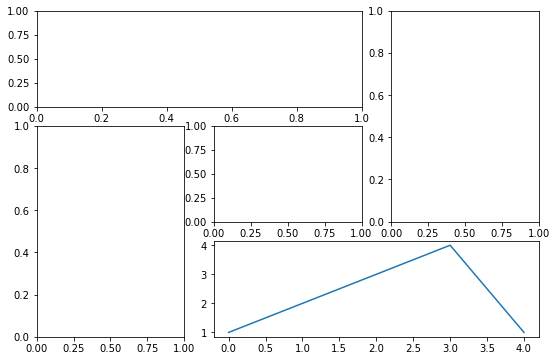

In [17]:
fig = plt.figure(figsize = (9,6))
ax1 = plt.subplot2grid((3,3), (0,0), colspan = 2)
ax2 = plt.subplot2grid((3,3), (0,2), rowspan = 2) 
ax3 = plt.subplot2grid((3,3), (1,0), rowspan = 2) 
ax4 = plt.subplot2grid((3,3), (1,1)) # rowspan/colspan默认为1 
ax5 = plt.subplot2grid((3,3), (2,1), colspan = 2) 
ax5.plot([1,2,3,4,1])
plt.show()

### 4.1.9  导出图表

True

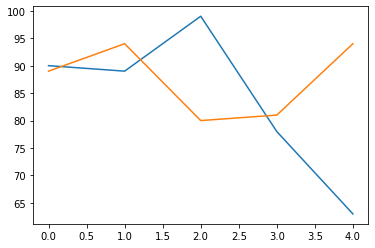

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
from lxml import etree
import base64
import webbrowser

data = pd.DataFrame({'id':['1','2','3','4','5'], # 构造数据
                     'math':[90,89,99,78,63],
                     'english':[89,94,80,81,94]})
plt.plot(data['math']) # matplotlib做图
plt.plot(data['english'])

# 保存图片（与网页显示无关）
plt.savefig('test.jpg',dpi=300)

# 保存网页
buffer = BytesIO()
plt.savefig(buffer)  
plot_data = buffer.getvalue()

imb = base64.b64encode(plot_data)  # 生成网页内容
ims = imb.decode()
imd = "data:image/png;base64,"+ims
data_im = """<h1>Figure</h1>  """ + """<img src="%s">""" % imd   
data_des = """<h1>Describe</h1>"""+data.describe().T.to_html()
root = "<title>Dataset</title>"
root = root + data_des + data_im

html = etree.HTML(root)
tree = etree.ElementTree(html)
tree.write('tmp.html')
#使用默认浏览器打开 html 文件
webbrowser.open('tmp.html',new = 1)

### 4.1.10  Matplotlib技巧

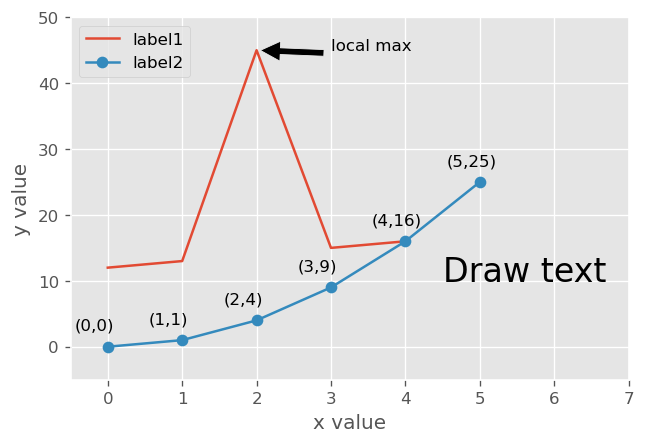

In [19]:
import matplotlib

fig = plt.figure(figsize = (6,4), dpi=120) # 设置绘制对象大小
plt.style.use('ggplot') # 设置显示风格

plt.plot([12,13,45,15,16], label='label1') # 绘图及设置图例文字
plt.annotate('local max', xy=(2, 45), xytext=(3, 45),arrowprops=dict(facecolor='black',
    shrink=0.05))  # 绘制带箭头的标注
x = np.arange(0, 6)
y = x * x
plt.plot(x, y, marker='o', label='label2') # 绘图及设置图例文字
for xy in zip(x, y):
    plt.annotate("(%s,%s)" % xy, xy=xy, xytext=(-20, 10), # 绘制标注
                 textcoords='offset points')
plt.text(4.5, 10, 'Draw text', fontsize=20) # 在位置0,20绘制文字

plt.legend(loc='upper left')  # 在左上角显示图例
plt.xlabel("x value")  # 设置x轴上的标签
plt.ylabel("y value")  # 设置y轴上的标签
plt.xlim(-0.5,7)  # 设置x轴范围
plt.ylim(-5,50) # 设置y轴范围
plt.show()

# print(matplotlib.artist.getp(fig.patch))  # 显示绘制对象的各个属性值